# Image Feature Matching with Scale Invariant Feature Transform (SIFT)

The Scale Invariant Feature Transform (SIFT) algorithm is a powerful tool in computer vision for identifying and matching keypoints (distinctive regions) within images. It excels at finding these keypoints regardless of variations in image scale, rotation, and illumination. 



In [1]:
import os
import numpy as np 
import cv2 as cv
from IPython.display import Image, display 

In [2]:
def imshow(img, ax=None):
    if ax is None:
        _, encoded = cv.imencode(".png", img)
        display(Image(encoded))
    else:
        ax.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        ax.axis('off')

In [3]:
image_path = os.path.join(os.pardir, os.pardir, os.pardir, 'img', 'classification', 'sample.png')

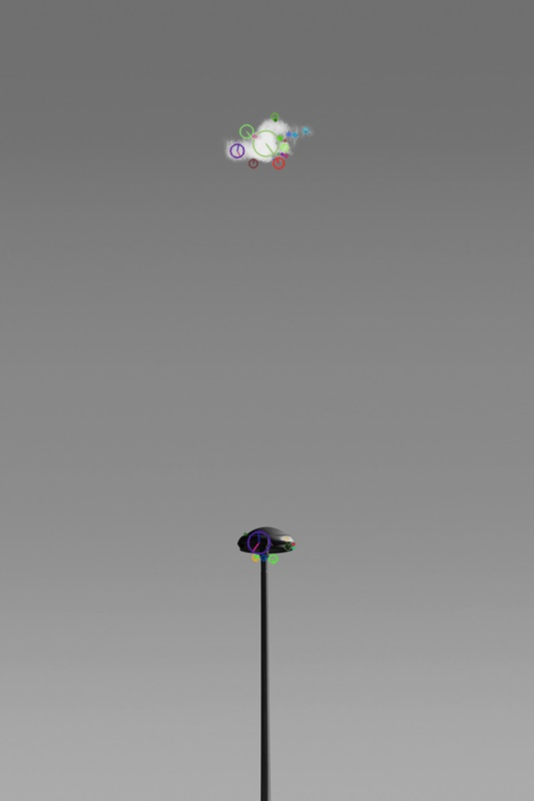

In [4]:
image = cv.imread(image_path)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
imshow(image)

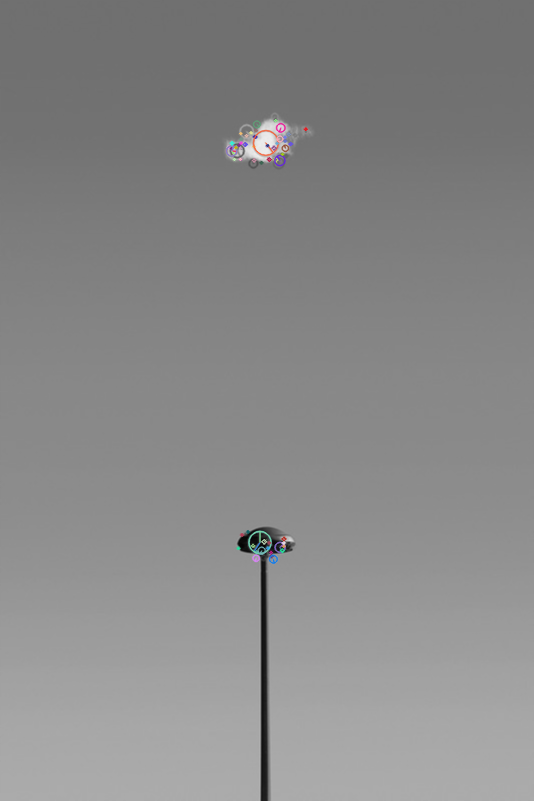

In [5]:
sift = cv.SIFT_create()
mask = None
kp = sift.detect(image, mask)
 
img_key_points = cv.drawKeypoints(image_gray, kp, image, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imshow(img_key_points)

# Compare two images using the keypoints of SIFT

In [6]:
def compare_img(img1, img2):
    sift = cv.SIFT_create()

    # Detect keypoints and compute descriptors
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    bf = cv.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # Apply ratio test for good matches
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7*n.distance:
            good_matches.append(m)

    # Draw matches on images
    img_matches = cv.drawMatchesKnn(img1, kp1, img2, kp2, [good_matches], None, flags=2)

    imshow(img_matches)

## Rotation

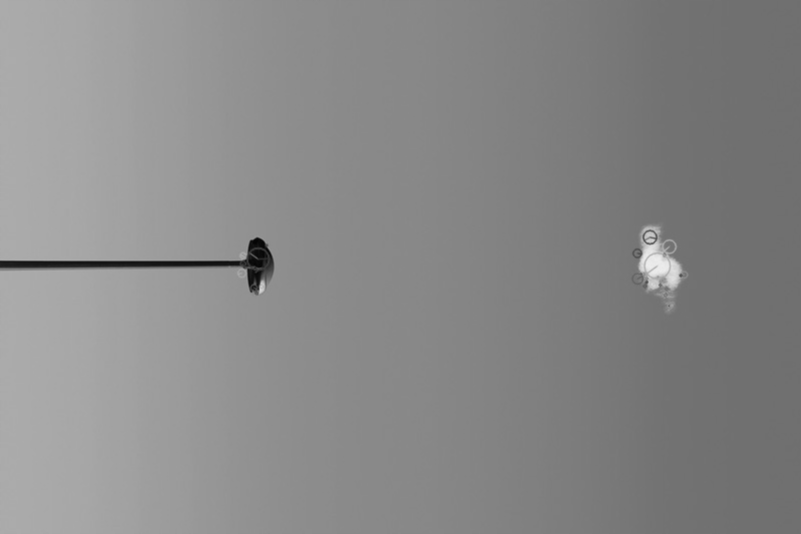

In [7]:
gray_rotated =  cv.rotate(image_gray, cv.ROTATE_90_CLOCKWISE)

imshow(gray_rotated)

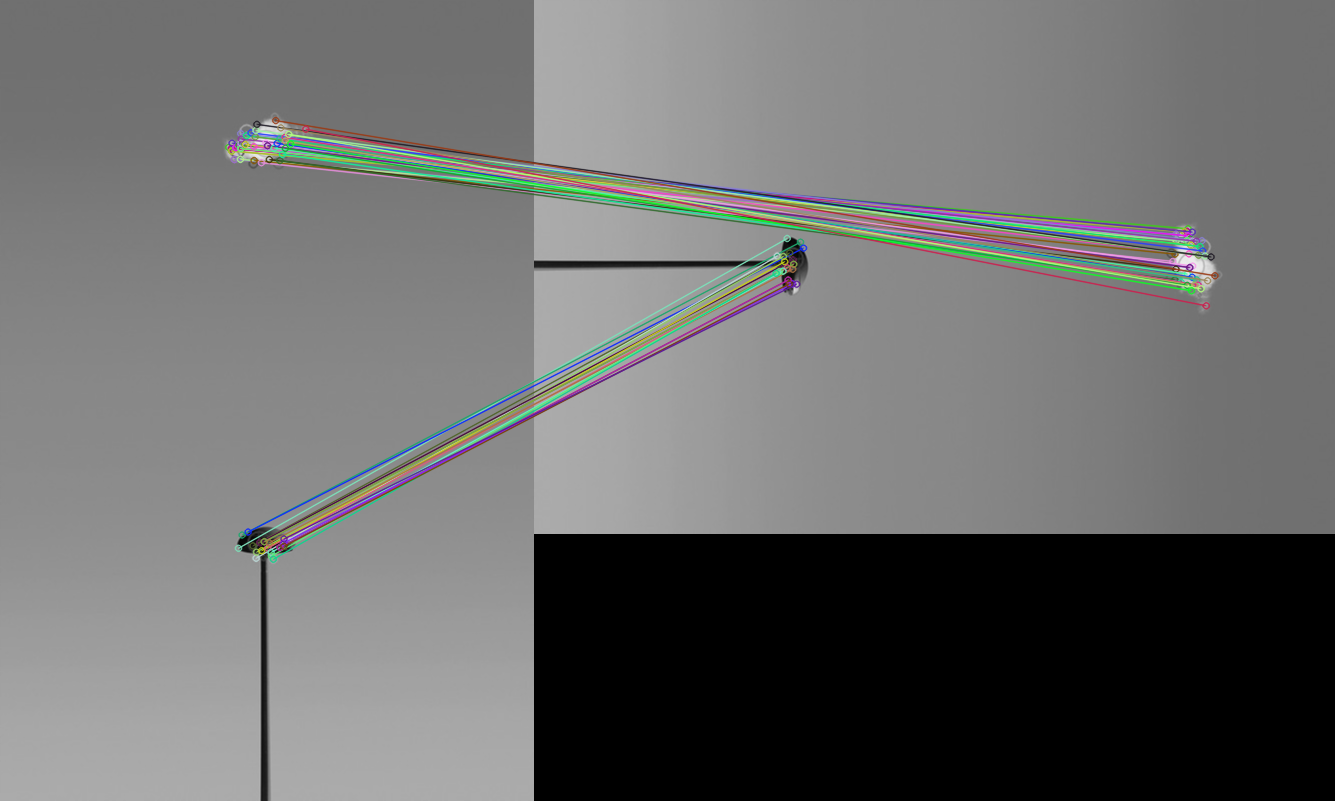

In [8]:
compare_img(image_gray, gray_rotated)

## Luminosity

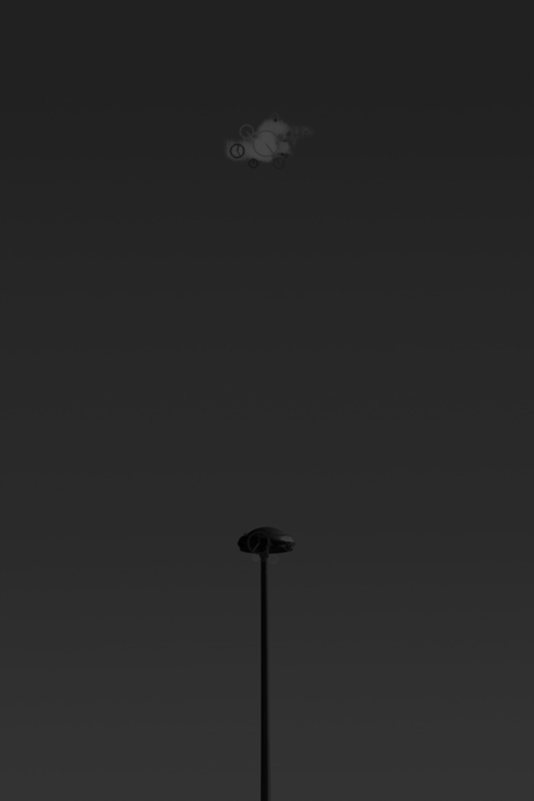

In [9]:
luminosity_factor = 0.3
gray_black = image_gray * luminosity_factor
gray_black = gray_black.astype(np.uint8)

imshow(gray_black)

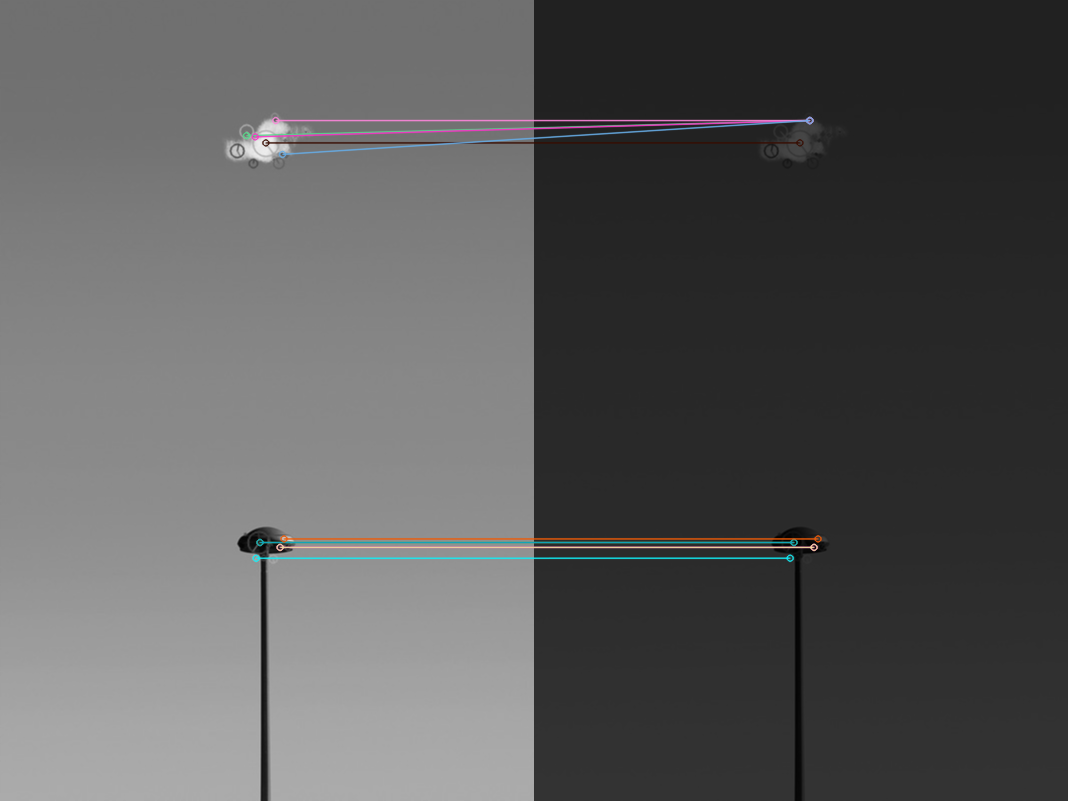

In [10]:
compare_img(image_gray, gray_black)

## Scale

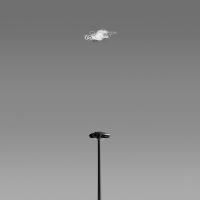

In [11]:
scaled_gray = cv.resize(image_gray, (200, 200))
imshow(scaled_gray)

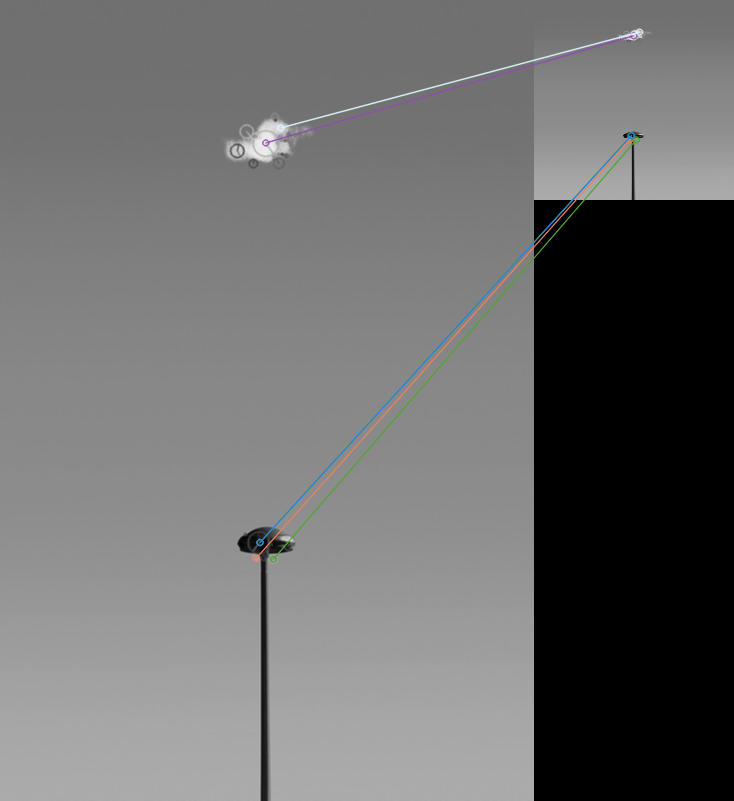

In [12]:
compare_img(image_gray, scaled_gray)